# Big Mart Sales Prediction

## Project Description
This project aims to predict product sales for Big Mart outlets using historical sales data.
The analysis includes data preprocessing, exploratory data analysis (EDA), feature engineering,
and machine learning model building.

## Tools & Technologies
- Python (Pandas, NumPy)
- Data Visualization (Matplotlib)
- Machine Learning (Scikit-learn)
- Power BI (for dashboard visualization)

## Models Used
- Linear Regression
- Random Forest Regressor


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


In [2]:
train = pd.read_csv(r"Untitled Folder/train.csv")
test = pd.read_csv(r"Untitled Folder/test.csv")

train.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
# Handling missing values
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean())

train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size'] = test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])


In [5]:
# Creating new feature
train['Outlet_Years'] = 2024 - train['Outlet_Establishment_Year']
test['Outlet_Years'] = 2024 - test['Outlet_Establishment_Year']

train[['Outlet_Establishment_Year', 'Outlet_Years']].head()


,Outlet_Establishment_Year,Outlet_Years
0,1999,25
1,2009,15
2,1999,25
3,1998,26
4,1987,37


In [6]:
le = LabelEncoder()
categorical_cols = train.select_dtypes(include='object').columns

for col in categorical_cols:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])


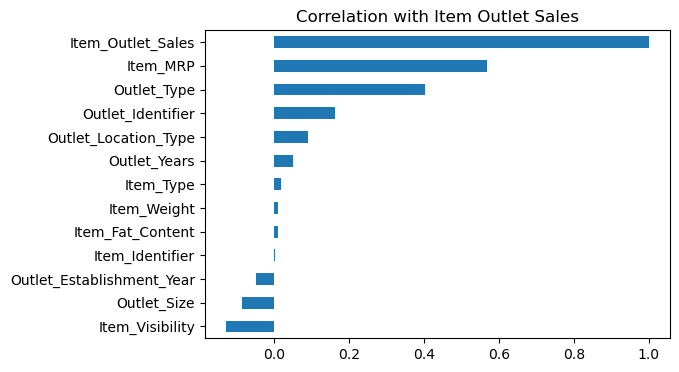

In [8]:
correlation = train.corr()['Item_Outlet_Sales'].sort_values()

plt.figure(figsize=(6,4))
correlation.plot(kind='barh')
plt.title("Correlation with Item Outlet Sales")
plt.show()


In [13]:
X = train.drop('Item_Outlet_Sales', axis=1)
y = train['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [16]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_predictions)


In [17]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, lr_predictions)

lr_r2


0.5248248187396569

In [18]:
print("Linear Regression R2 Score:", round(lr_r2, 3))
print("Random Forest R2 Score:", round(rf_r2, 3))


Linear Regression R2 Score: 0.525
Random Forest R2 Score: 0.561


## Conclusion

- Random Forest Regressor performed better than Linear Regression.
- Item MRP and Outlet Type have the strongest influence on sales.
- Machine Learning models can effectively forecast retail sales.

This project demonstrates end-to-end data analysis, feature engineering,
and predictive modeling using Python.
